In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
%matplotlib inline

In [2]:
# Setting the Seaborn style

sns.set(font_scale=0.8)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("Set2"))

# The Coursera course dataset analysis

## Scenario

__NOTE:__ In this project, no official guidelines on how one should approach the dataset was provided, so one is expected to freely explore the dataset with raising hypotheses and questions along the process. However, to make matters easier, I decided to draft a brief scenario, which would guide me in my data analysis, and ultimatelly provide some benchmark to evaluate my work. Here's the story:

You work as a data analyst in some technology comapany, and your colleague from HR approaches you with a request. The company wants to upskill their employees and provide them with access to some of the Coursera's courses. They have found a course dataset and want you to have a look at it, and come up with recommendations which courses should be selected and purchased for training. There are some important things to know, before you start with your EDA:
- The company's rather small, that's why they do not opt for enterprise subscription, it just doesn't make sense yet – you should also think about effective way to satisfy the needs with least resources (e.g., looking for courses that benefit the whole organisation);
- In the recent internal survey, the majority of your colleagues indicated that they should upskill in the  AI and better understand its applicability in their field; however, this shouldn't constrain you, if you find better suited courses in other domains;
- In your company you have marketing department, Python developers, HR, data team, management;
- There are people with different levels of seniority working in your team, so you should look for courses that benefit different experience levels;


## Approach

### Exploratory data analysis (EDA)

1. Understanding the dataset:
    - removal of unnecessary columns;
    - conversion of column values;
    - conversion of feature data types.

2. Data wrangling and exploration:
    - descriptions of the dataset;
    - min and max values in some of the features;
    - data normalization and scaling;
    - introduction of additional categorical feature (organization type);
    - ploting and analyzing categorical variables.

3. Exploration based on scenario
    - course categorization;
    - general insights on the dataset;
    - a rudimentary `Streamlit` one-pager for course selection directory.

## 1. Data preparation and overview

First, let's import the data and see how it looks:

In [3]:
course_data = pd.read_csv('dataset/coursera_data.csv')
course_data.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


Checking the length of the `Unnamed 0` column and its min-max values:

In [5]:
print("Unnamed min() val: ", course_data['Unnamed: 0'].min())
print("Unnamed max() val: ", course_data['Unnamed: 0'].max())
print("Number of observations: ", "\n", course_data.count())

Unnamed min() val:  0
Unnamed max() val:  890
Number of observations:  
 Unnamed: 0                  891
course_title                891
course_organization         891
course_Certificate_type     891
course_rating               891
course_difficulty           891
course_students_enrolled    891
dtype: int64


We have unused `Unnamed: 0` column, which corresponds to the dataset length. Resetting it as index and sorting the dataframe based on it.

In [6]:
course_data.rename(columns={"Unnamed: 0": "index"}, inplace=True)
course_data = course_data.set_index('index').sort_index()

In [7]:
course_data.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
index,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k


We can now look at the datatypes of each column.

In [8]:
course_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    object 
dtypes: float64(1), object(5)
memory usage: 48.7+ KB


From this we can infer that the majority of variables are object-type (in this case, strings), but we could also make the dataset more accessible for manipulation by converting some of the features:
- into categorical: `course_difficulty` and `course_Certificate_type`;
- into numerical: `course_students_enrolled`

First, let's set features to categorical:

In [9]:
course_data['course_Certificate_type'] = course_data.course_Certificate_type.astype('category')
course_data['course_difficulty'] = course_data.course_difficulty.astype('category')

Setting enrolled student count to numerical:

In [10]:
def value_to_float(x):
    """
    Takes a string notation of enrolled student count and converts it to float number

    Parameters
    ----------
    x : str
        The string that contains course student count in format 100k or 3m

    Returns
    -------
    x : float
        This function returns a floating point value, removing the thousands
        or millions notation in string (k or m) and multiplying the remainder
        digit by 1000 or 1000000 accordingly.

    Notes
    -----
    - This function is used in pandas df.apply() method to change the cell values
    of the feature.
    """
    if 'k' in x:
        if len(x) > 1:
            return float(x.replace('k', '')) * 1000
        return 1000.0
    if 'm' in x:
        if len(x) > 1:
            return float(x.replace('m', '')) * 1000000
        return 1000000.0
    return 0.0

course_data['course_students_enrolled'] = course_data['course_students_enrolled'].apply(value_to_float)

In [11]:
# checking on data now
course_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   course_title              891 non-null    object  
 1   course_organization       891 non-null    object  
 2   course_Certificate_type   891 non-null    category
 3   course_rating             891 non-null    float64 
 4   course_difficulty         891 non-null    category
 5   course_students_enrolled  891 non-null    float64 
dtypes: category(2), float64(2), object(2)
memory usage: 36.9+ KB


## 2. Data wrangling and exploration

Before going into a deeper analysis of the dataset, we'll look at some summary statistics:

1. The most popular course
2. The least popular course
3. The best rated course
4. The worst rated course
5. The number of features
6. The number of observations
7. The institution with the most courses offered
8. The number of institutions offering courses

In [86]:
print('1. The most popular course is: \n')
course_data.iloc[course_data['course_students_enrolled'].idxmax()]

1. The most popular course is: 



course_title                   Machine Learning
course_organization         Stanford University
course_Certificate_type                  COURSE
course_rating                               4.9
course_difficulty                         Mixed
course_students_enrolled              3200000.0
Name: 6, dtype: object

In [87]:
print('2. The least popular course is: \n')
course_data.iloc[course_data['course_students_enrolled'].idxmin()]

2. The least popular course is: 



course_title                El Abogado del Futuro: Legaltech y la Transfor...
course_organization                                       Universidad Austral
course_Certificate_type                                                COURSE
course_rating                                                             5.0
course_difficulty                                                    Beginner
course_students_enrolled                                               1500.0
Name: 789, dtype: object

In [88]:
print('3. The best rated course is: \n')
course_data.iloc[course_data['course_rating'].idxmax()]

3. The best rated course is: 



course_title                Infectious Disease Modelling
course_organization              Imperial College London
course_Certificate_type                   SPECIALIZATION
course_rating                                        5.0
course_difficulty                           Intermediate
course_students_enrolled                          1600.0
Name: 401, dtype: object

In [89]:
print('4. The worst rated course is: \n')
course_data.iloc[course_data['course_rating'].idxmin()]

4. The worst rated course is: 



course_title                How To Create a Website in a Weekend! (Project...
course_organization                          The State University of New York
course_Certificate_type                                                COURSE
course_rating                                                             3.3
course_difficulty                                                       Mixed
course_students_enrolled                                             140000.0
Name: 767, dtype: object

In [93]:
print('5. The number of features in the set: \n')
print(f'There are {len(course_data.columns)} features in this set')

5. The number of features in the set: 

There are 6 features in this set


In [95]:
print('6. The number of observations in the set: \n')
print(f'There are {len(course_data.index)} observations in this set')

6. The number of observations in the set: 

There are 891 observations in this set


In [115]:
print('7. The organization with most courses: \n')


print(f"The most courses are offered by {course_data['course_organization'].value_counts().idxmax()}, offering {course_data['course_organization'].value_counts().max()} courses.")

7. The organization with most courses: 

The most courses are offered by University of Pennsylvania, offering 59 courses.


In [12]:
print(f"8. The courses are offered by {course_data['course_organization'].value_counts().count()} different institutions.")

8. The courses are offered by 154 different institutions.


### 2.1 Data cleaning and normalization

Now, as we have two numerical columns, let's print a descriptive statistics summary on those, and plot them as histograms.

In [13]:
course_data.describe().round(2)

,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


Text(0, 0.5, '')

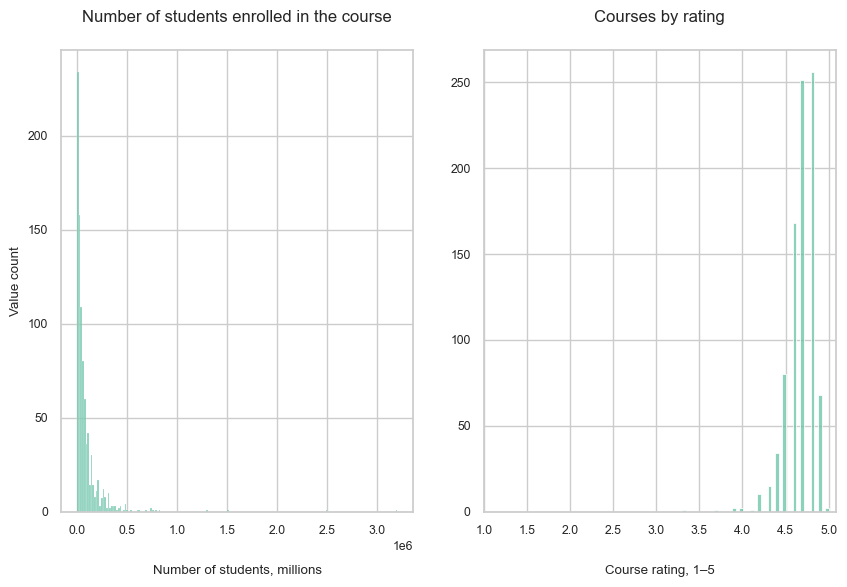

In [56]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.histplot(course_data['course_students_enrolled'])
plt.title('Number of students enrolled in the course', pad=20, fontsize = 12)
plt.xlabel('Number of students, millions', labelpad=20)
plt.ylabel('Value count')

plt.subplot(1, 2, 2)
sns.histplot(course_data['course_rating'])
plt.title('Courses by rating', pad=20, fontsize = 12)
plt.xlabel('Course rating, 1–5', labelpad=20)
plt.xlim(left=1)
plt.ylabel('')


These plots show that the numeral features we have are greatly skewed, given their range.

- Most of the courses have up to 500k students, with several exception in range 0.5–1m and two outliers;
- The courses are generously evaluated in range 4 to 5, with the lowest value just above 3 points.

These graphs suggest that we should formally check for and, if needed, isolate the outliers. This applies to the `course_students_enrolled` column, as it clearly has some courses that skew the data. 

As for the course rating, we might scale the date so it falls in range (0, 1), as more than half of the rating scale (1-3) has no observations.

First, we define the function to use z-score method to detect outliers.

In [15]:
def find_outliers(column, method='zscore', threshold=3):
    """
    This function detects outliers in a numerical column using a specified method.

    Args:
    column (pandas.Series): The numerical column to analyze.
    method (str, optional): The method for outlier detection. Defaults to 'zscore'.
        - 'zscore': Uses z-scores (standard deviations from the mean).
        - 'iqr': Uses Interquartile Range (IQR).
    threshold (float, optional): The threshold for outlier detection. Defaults to 3.
        - For z-scores, values with absolute value exceeding the threshold are considered outliers.
        - For IQR, values below Q1 - threshold * IQR or above Q3 + threshold * IQR are considered outliers.

    Returns:
    pandas.Series: A Series containing True for outliers and False for non-outliers.    
    """

    if method == 'zscore':
        z_scores = stats.zscore(column)
        return np.abs(z_scores) > threshold
    elif method == 'iqr':
        q1 = column.quantile(0.25)
        q3 = column.quantile(0.75)
        iqr = q3 - q1
        return (column < (q1 - threshold * iqr)) | (column > (q3 + threshold * iqr))
    else:
        raise ValueError("Invalid method. Choose 'zscore' or 'iqr'.")

Then we run the `find_outliers` function on `course_students_enrolled` and `course_rating` features to find the outliers and decide, how we approach them.

In [18]:
enrolled_outliers = find_outliers(course_data["course_students_enrolled"], method='zscore')
enrolled_outliers_df = course_data[enrolled_outliers]
enrolled_outliers_df.sort_values(by='course_students_enrolled', ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
index,,,,,,
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
175,English for Career Development,University of Pennsylvania,COURSE,4.8,Mixed,760000.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0


In [19]:
rating_outliers = find_outliers(course_data["course_rating"], method='zscore')
rating_outliers_df = course_data[rating_outliers]
rating_outliers_df.sort_values(by='course_rating', ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
index,,,,,,
609,How to Start Your Own Business,Michigan State University,SPECIALIZATION,4.1,Beginner,34000.0
659,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.0,Intermediate,13000.0
873,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.0,Intermediate,33000.0
178,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.9,Intermediate,15000.0
779,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.9,Intermediate,76000.0
352,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.7,Intermediate,29000.0
767,How To Create a Website in a Weekend! (Project...,The State University of New York,COURSE,3.3,Mixed,140000.0


After isolating the outliers in both columns, we see that in terms of __enrolled students__ we have the skew in the upper range of values some of the courses have millions of students, compared to 90k as mean. When we consider the __course rating__, the situation is reversed: we have the outlier values in the end of the lower values – those are the courses that have lower reviews. We have no overlaps (bad-rated, high-attendance courses).

How should we deal with these data?

1. High-attendance courses could be isolated in a separate dataframe, as we can assume them as a valuable and mostly well-rated ones;
2. Low-rated courses can be removed from our analysis all together: in a 891 course dataset they make up a relatively small subset of courses, which have outlier low rate in a context of a rather high ratings; we could easily find alternatives to those. 



In [21]:
# checking the length to make sure that observations were removed (original n=891)

cd_no_outliers = course_data.drop(labels=rating_outliers_df.index, axis=0)
cd_no_outliers = cd_no_outliers.drop(labels=enrolled_outliers_df.index, axis=0)
len(cd_no_outliers)

874

__IMPORTANT__: Just to take note, we still have `enrolled_outliers_df` dataframe for very popular courses; for exploratory analysis, we'll use `cd_no_outliers` dataframe.

Text(0, 0.5, '')

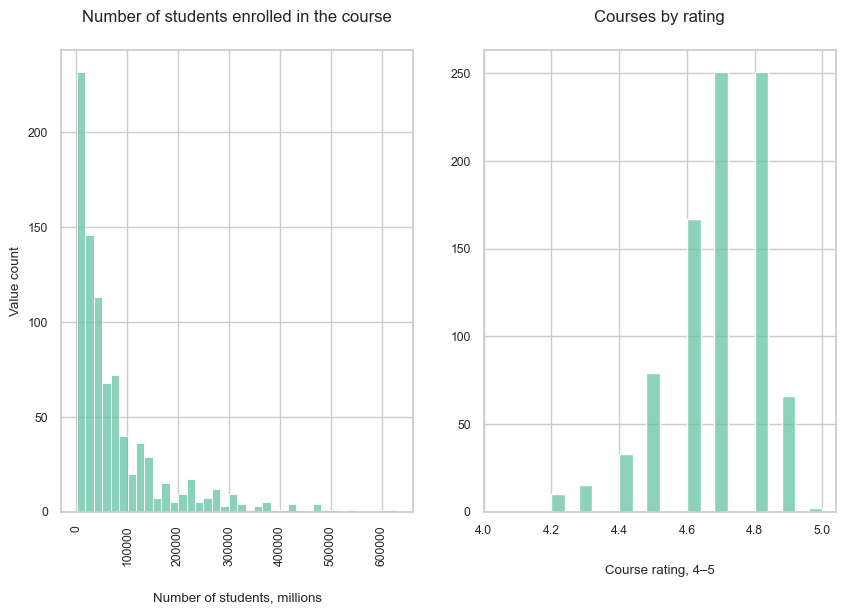

In [54]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.histplot(cd_no_outliers['course_students_enrolled'])
plt.title('Number of students enrolled in the course', pad=20, fontsize = 12)
plt.xlabel('Number of students, millions', labelpad=20)
plt.ylabel('Value count')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.histplot(cd_no_outliers['course_rating'])
plt.title('Courses by rating', pad=20, fontsize = 12)
plt.xlabel('Course rating, 4–5', labelpad=20)
plt.xlim(left=4)
plt.ylabel('')

Before delving into categorical feature analysis, let's rescale ratings data.

In [23]:
cd_no_outliers['course_rating_scaled'] = cd_no_outliers['course_rating']

In [24]:
cd_no_outliers['course_rating_scaled'] = (cd_no_outliers['course_rating_scaled'] - cd_no_outliers['course_rating_scaled'].min()) / (cd_no_outliers['course_rating_scaled'].max() - cd_no_outliers['course_rating_scaled'].min())

In [25]:
cd_no_outliers.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled,course_rating_scaled
index,,,,,,,
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480000.0,0.500
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310000.0,0.500
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350000.0,0.750
7,Business Foundations,University of Pennsylvania,SPECIALIZATION,4.7,Beginner,510000.0,0.625
8,Applied Data Science,IBM,SPECIALIZATION,4.6,Beginner,220000.0,0.500


As we only have two numerical variables, let's make a scatterplot and evaluate their relationship.

In [74]:
cd_no_outliers['course_students_enrolled'].corr(cd_no_outliers['course_rating_scaled'])

0.02930551826057081

Text(0, 0.5, 'Scaled course rating')

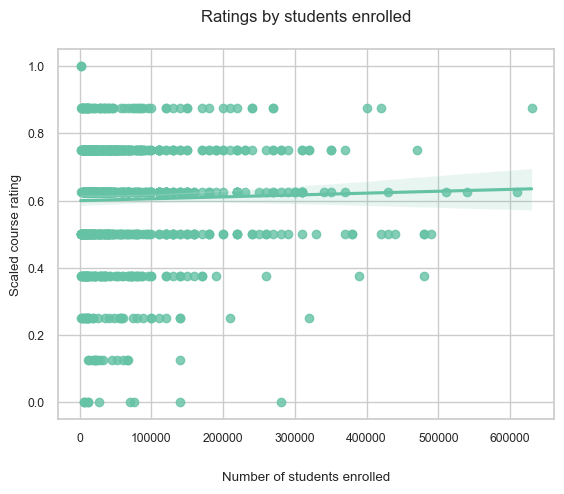

In [80]:
sns.regplot(data=cd_no_outliers, x='course_students_enrolled', y='course_rating_scaled')
plt.title('Ratings by students enrolled', pad=20, fontsize = 12)
plt.xlabel('Number of students enrolled', labelpad=20)
plt.ylabel('Scaled course rating')

Both statistical and graphical explorations show no realtionship between the variables.

We proceed with analysis of rating in course categories.

Text(28.65475925925928, 0.5, 'Course difficulty')

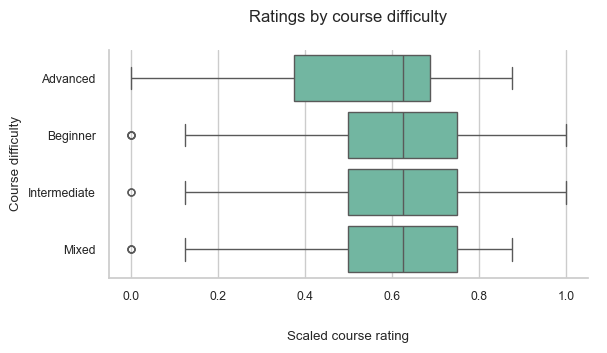

In [52]:
sns.catplot(x='course_rating_scaled', y='course_difficulty', kind='box', data=cd_no_outliers, height=3, aspect=2)
plt.title('Ratings by course difficulty', pad=20, fontsize = 12)
plt.xlabel('Scaled course rating', labelpad=20)
plt.ylabel('Course difficulty')

Text(30.42494444444445, 0.5, 'Course certificate type')

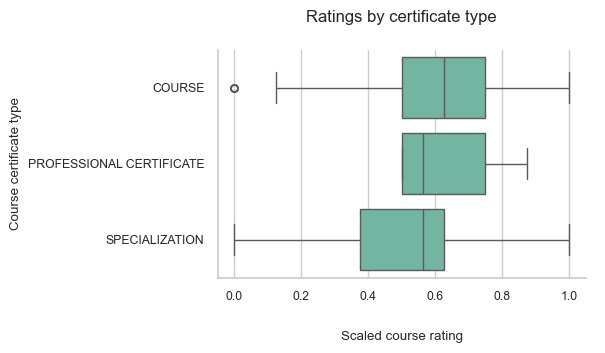

In [51]:
sns.catplot(x='course_rating_scaled', y='course_Certificate_type' , kind='box', data=cd_no_outliers, height=3, aspect=2)
plt.title('Ratings by certificate type', pad=20, fontsize = 12)
plt.xlabel('Scaled course rating', labelpad=20)
plt.ylabel('Course certificate type')

### 2.2 Plotting the categorical features

Let's look at the categorical features and how they plot out.

In [41]:
cd_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 874 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   course_title              874 non-null    object  
 1   course_organization       874 non-null    object  
 2   course_Certificate_type   874 non-null    category
 3   course_rating             874 non-null    float64 
 4   course_difficulty         874 non-null    category
 5   course_students_enrolled  874 non-null    float64 
 6   course_rating_scaled      874 non-null    float64 
dtypes: category(2), float64(3), object(2)
memory usage: 43.0+ KB


Let's explore course organization a bit. It seems that we can further categorize the course providers, so it would give us additional insights. 

In [42]:
course_data['course_organization'].unique()

array(['IBM', 'Yale University', 'University of Michigan', 'Google',
       'deeplearning.ai', 'Stanford University',
       'University of Pennsylvania', 'Google Cloud',
       'Macquarie University', 'Johns Hopkins University',
       'University of Illinois at Urbana-Champaign',
       'University of California, Irvine',
       'Georgia Institute of Technology', 'Duke University', 'PwC',
       'Amazon Web Services', 'California Institute of the Arts',
       'Columbia University', 'Northwestern University',
       'Rutgers the State University of New Jersey',
       'University of Minnesota', 'University of Virginia',
       'Imperial College London', 'Arizona State University',
       'Universitat Autònoma de Barcelona', 'Wesleyan University',
       'University of Alberta', 'University of California, Davis',
       'London Business School', 'Università Bocconi',
       'University of Geneva', 'Berklee College of Music',
       'University of Amsterdam',
       'The Hong Kong Univ

We can draft preliminary categories:
- academic institutions,
- corporates,
- others (learning providers, non-profits, etc.)

It will require a bit of manual work, but we can introduce additional column to store this data:

In [43]:
cd_no_outliers['course_organization_type'] = 'NaN'
cd_no_outliers = cd_no_outliers[['course_title',
 'course_organization',
 'course_organization_type',
 'course_Certificate_type',
 'course_rating',
 'course_rating_scaled',
 'course_difficulty',
 'course_students_enrolled'
 ]]

In [44]:
# Academic institution keywords:
academic_kw = ['Academy', 'University', 'School', 'Institute', 'École', 'College', 'Universitat', 'Università', 'Universidad', 'Universiteit', 'Tecnológico', 'Universität', 'Instituto', 'HEC Paris', 'INSEAD', 'Sciences']

# Corporate institution keywords:
corp_kw = ["IBM", "Google", 'Amazon', 'Cisco', 'PwC', 'BCG', 'Mail.Ru Group', 'Cloudera', 'Autodesk', 'Palo Alto', 'JetBrains', 'Unity', 'Automation Anywhere', 'VMware', 'Atlassian']

# Now we run few loops to change the values:

for _ in academic_kw:
    cd_no_outliers.loc[cd_no_outliers.course_organization.str.contains(_), 'course_organization_type'] = 'Academic'

for _ in corp_kw:
    cd_no_outliers.loc[cd_no_outliers.course_organization.str.contains(_), 'course_organization_type'] = 'Corporate'

cd_no_outliers['course_organization_type'] = cd_no_outliers['course_organization_type'].replace(to_replace="NaN", value="Other")

Text(28.43272222222224, 0.5, 'Course organization type')

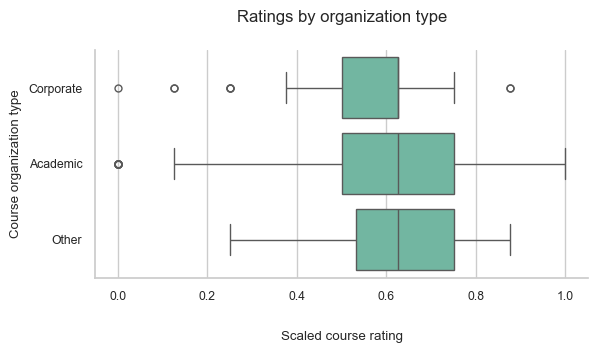

In [50]:
sns.catplot(x='course_rating_scaled', y='course_organization_type', kind='box', data=cd_no_outliers, height=3, aspect=2)
plt.title('Ratings by organization type', pad=20, fontsize = 12)
plt.xlabel('Scaled course rating', labelpad=20)
plt.ylabel('Course organization type')

This conversion was worth it as we can infer some differences in course evaluation, and it might provide us some guidance in answering HR's questions: notably, corporate courses are mostly mediocre: their evaluation is packed around middle values of the evaluation range, while academic courses cover the whole spectrum – if we were to look for most valuable courses, we should definitely first look at academic institutions.

Now, let's see how we could plot the remainder categorical values.

In [27]:
print(f'The organization types: \n \n {cd_no_outliers['course_organization_type'].value_counts()}')
print('---')
print(f'The course difficulty: \n \n {cd_no_outliers['course_difficulty'].value_counts()}')
print('---')
print(f'The course certificate type: \n \n {cd_no_outliers['course_Certificate_type'].value_counts()}')

The organization types: 
 
 course_organization_type
Academic     736
Corporate     92
Other         46
Name: count, dtype: int64
---
The course difficulty: 
 
 course_difficulty
Beginner        482
Intermediate    192
Mixed           181
Advanced         19
Name: count, dtype: int64
---
The course certificate type: 
 
 course_Certificate_type
COURSE                      574
SPECIALIZATION              288
PROFESSIONAL CERTIFICATE     12
Name: count, dtype: int64


Text(-150.65555555555554, 0.5, 'Certificate type')

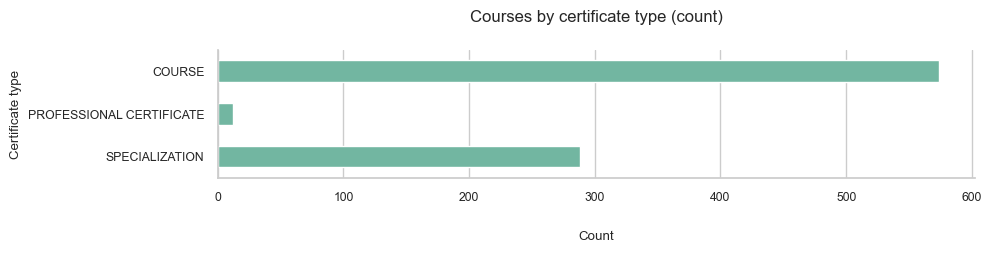

In [57]:
sns.set(font_scale=0.8)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("Set2"))
sns.catplot(cd_no_outliers['course_Certificate_type'],
            kind="count",
            height=2, 
            aspect=5,
            width=0.5)
plt.title('Courses by certificate type (count)', pad=20, fontsize = 12)
plt.xlabel('Count', labelpad=20)
plt.ylabel('Certificate type')

Text(57.85942871093745, 0.5, 'Certificate type')

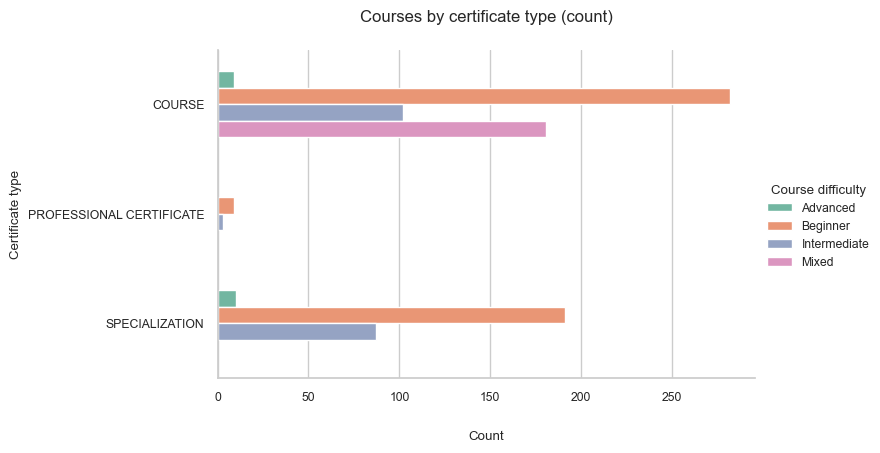

In [62]:
certificate_count = sns.catplot(data=cd_no_outliers,
            y='course_Certificate_type',
            kind="count",
            hue="course_difficulty",
            height=4, 
            aspect=2,
            width=0.6,
            orient='h',
            legend=True)
plt.title('Courses by certificate type (count)', pad=20, fontsize = 12)
certificate_count._legend.set_title("Course difficulty")
plt.xlabel('Count', labelpad=20)
plt.ylabel('Certificate type')

Text(40.76353027343751, 0.5, 'Organization type')

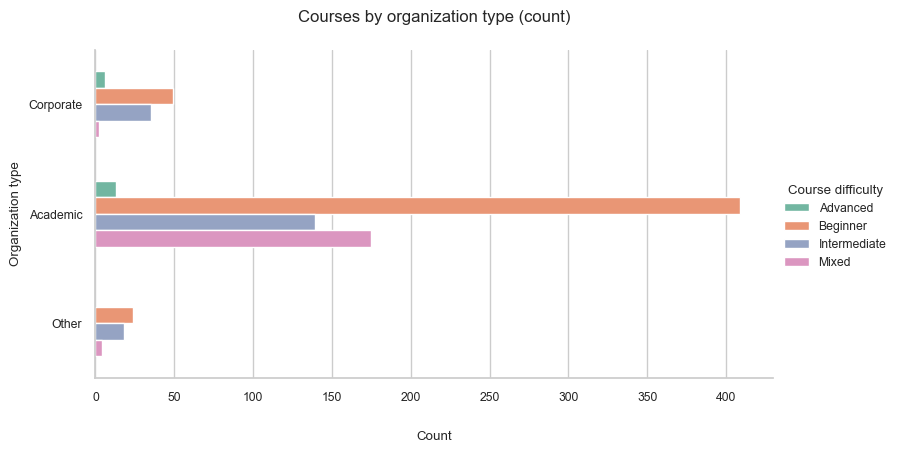

In [63]:
orgtype_count = sns.catplot(data=cd_no_outliers,
            y='course_organization_type',
            kind="count",
            hue="course_difficulty",
            height=4, 
            aspect=2,
            width=0.6,
            orient='h',
            legend=True)
plt.title('Courses by organization type (count)', pad=20, fontsize = 12)
orgtype_count._legend.set_title("Course difficulty")
plt.xlabel('Count', labelpad=20)
plt.ylabel('Organization type')

In [67]:
fig = px.violin(cd_no_outliers, x='course_difficulty', y="course_rating_scaled", color="course_organization_type",
                labels={
                     "course_organization_type": "Course ourganization type",
                     "course_rating_scaled": "Course rating",
                     "course_difficulty": "Difficulty"
                 },
                title="Distribution of courses in different diffculty levels")
fig.show()

Finally, let's redo our initial distribution charts in a more sophisticated way:

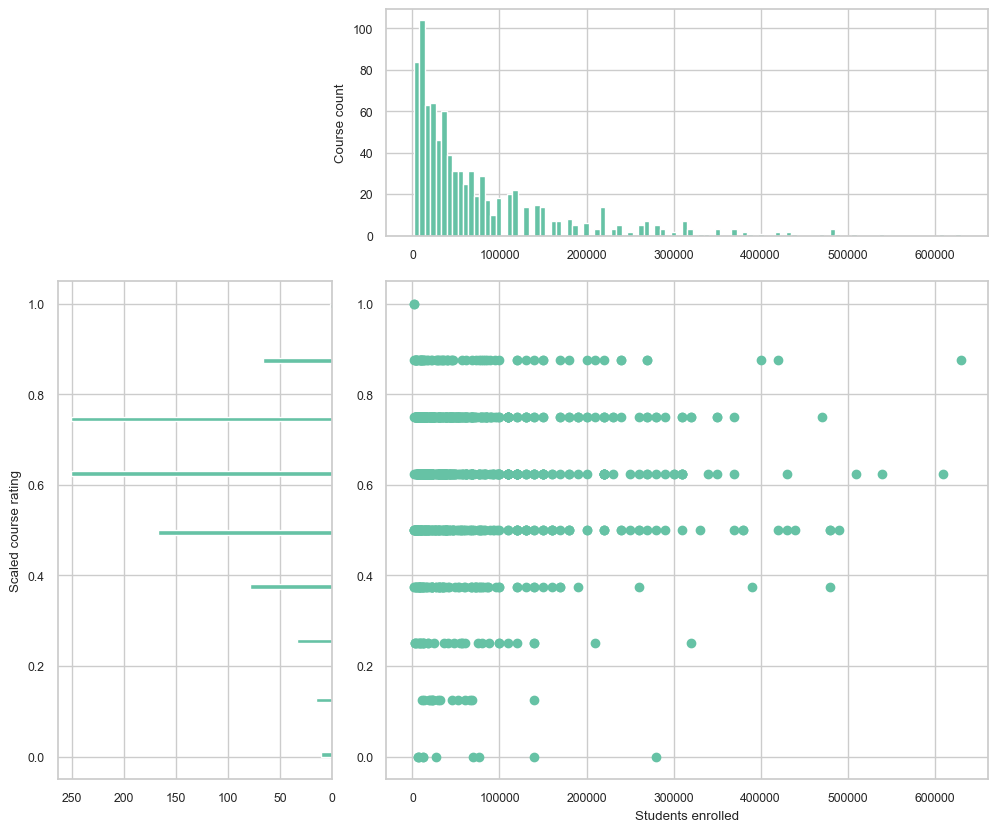

In [68]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,10))
gspec = gridspec.GridSpec(3, 3)


# the gridspec is indexed as rows and cols
# using the indexing operator or sq bracks
# first subplot and hist in row 0

top_histogram = plt.subplot(gspec[0, 1:])

# second hist takes row 1, but is limited to col 0

side_histogram = plt.subplot(gspec[1:, 0])

# scatter plot in bottom right

lower_right = plt.subplot(gspec[1:, 1:])




X = cd_no_outliers['course_rating_scaled']
Y = cd_no_outliers['course_students_enrolled']

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])
# and with data inputs

lower_right.scatter(Y, X)
lower_right.set_xlabel('Students enrolled')
top_histogram.hist(Y, bins=100)
top_histogram.set_ylabel('Course count')
side_histogram.hist(X, bins=100, orientation='horizontal');
side_histogram.set_ylabel('Scaled course rating')

side_histogram.invert_xaxis()


Text(0.5, 1.0, 'Scaled rating and students enrolled in course: distribution (kde)')

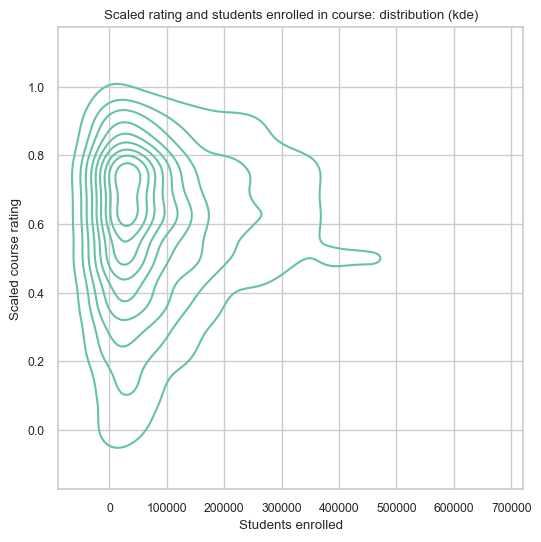

In [69]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca()
# sns.set_style("whitegrid")
# sns.kdeplot(cd_no_outliers[['course_rating_scaled', 'course_students_enrolled']], ax = ax)
sns.kdeplot(data=cd_no_outliers, x='course_students_enrolled', y='course_rating_scaled', ax = ax)
ax.set_xlabel('Students enrolled')
ax.set_ylabel('Scaled course rating')
ax.set_title('Scaled rating and students enrolled in course: distribution (kde)')

## EDA Insights


1. There are several mega-courses in the set, skewing the enrollment numbers; we isolated them into a separate dataframe, to offer them as 'most popular' selection, should we need it;
2. The ratings were generally on the very positive side, so it made sense to rescale them in range 0 to 1;
3. While scaled rating by difficulty level are not different, ratings of Professional Certificate courses are more contained and on a more positive end of the scale;
4. Ratings of courses offered by corporates are also contained in range 0.4-0.8, while ratings of academic courses are more diverse; however, it is worth noting that academic courses make up for the most of the courses detailed in this dataset;
5. Contrary to gut feeling, there are no professional certifications for advanced learners, they only offer beginner and intermediate-level courses;
6. Generally, there's an overall low selection of advanced courses, with beginner-friendly ones making most of the offering.

## 3. Exploration based on scenario

In the following cells, we try to create separate dataframes for our course directory. This is a very general approach without finesse: we just take the representing keyword(s) we think might indicate the course topic, and then only select those courses that are better than 75% in the category (i.e., filtering above 3rd quartile). As per request, we divide them into five categories:
- `data_courses`
- `ai_courses`
- `marketing_courses`
- `management_courses`
- `python_courses`

And taking previuosly separated outliers as `popular_courses`.

We do not further analyze the serived subsets, but we can definitely offers some insights:

__AI__: for general introduction, 'AI For Everyone' or 'Introduction to Artificial Intelligence (AI)' courses would suit the whole organization (rating 4.7-4.8); for experienced engineers and data scientists, 'IBM AI Enterprise Workflow' specialization might be an answer, as we have few advanced level courses in our selection;

__Data__: beginners should chekc 'Process Mining: Data science in Action' course, while experienced analysts might want to refresh their statistics knowledge with 'Bayesian Statistics: From Concept to Data Analysis';

__Python__: both beginners and more experienced analysts with basic Python knowledge should check out 'Python Data Structures'. There's also Google's 'Crash Course on Python' to get them started from scratch. For specific use-case, check 'Using Python to Access Web Data';

__Marketing__: beginner marketers should check for 'Introduction to Marketing' and 'Marketing in a Digital World' courses, and also the 'Brand Management: Aligning Business, Brand and Behaviour' from the management tab;

__Management__: this tab offers the most diverse selection of courses ranging from project management fundamentals to HR and business strategy questions; these courses should be selected by the manager's area of interest.

__Popular courses__: these courses have very high numbers of enrolled students, showing their popularity; courses like 'Career Success' can benefit everyone, but the majority of the list is dedicated to data, Python programming, deep learning and machine learning, showing the general trend of interest in these topics. If the employees want to opt for safe primers into this complex but emerging topic, they should definitely choose from these courses.

In [139]:
data_courses = cd_no_outliers.loc[
    (cd_no_outliers['course_title'].str.contains('Data')) & 
    (cd_no_outliers['course_rating_scaled'] >= cd_no_outliers['course_rating_scaled'].quantile(q=0.75))
    ]
data_courses

,course_title,course_organization,course_organization_type,course_Certificate_type,course_rating,course_rating_scaled,course_difficulty,course_students_enrolled,net_course_rating
index,,,,,,,,,
111,Python Data Structures,University of Michigan,Academic,COURSE,4.9,0.875,Mixed,420000.0,0.824204
199,Using Python to Access Web Data,University of Michigan,Academic,COURSE,4.8,0.750,Mixed,310000.0,0.715266
296,Modern Big Data Analysis with SQL,Cloudera,Corporate,SPECIALIZATION,4.8,0.750,Beginner,14000.0,0.622643
350,Using Databases with Python,University of Michigan,Academic,COURSE,4.8,0.750,Mixed,220000.0,0.705405
493,Bayesian Statistics: From Concept to Data Anal...,"University of California, Santa Cruz",Academic,COURSE,4.8,0.750,Intermediate,91000.0,0.674805
605,Data Analytics for Lean Six Sigma,University of Amsterdam,Academic,COURSE,4.8,0.750,Beginner,24000.0,0.633169
626,Process Mining: Data science in Action,Eindhoven University of Technology,Academic,COURSE,4.8,0.750,Intermediate,39000.0,0.646055
804,Data Visualization with Advanced Excel,PwC,Corporate,COURSE,4.8,0.750,Beginner,60000.0,0.659958


In [142]:
ai_courses = cd_no_outliers.loc[
    (cd_no_outliers['course_title'].str.contains('AI')) |
    (cd_no_outliers['course_title'].str.contains('Machine Learning')) & 
    (cd_no_outliers['course_rating_scaled'] >= cd_no_outliers['course_rating_scaled'].quantile(q=0.75))
    ]
ai_courses

,course_title,course_organization,course_organization_type,course_Certificate_type,course_rating,course_rating_scaled,course_difficulty,course_students_enrolled,net_course_rating
index,,,,,,,,,
12,IBM Applied AI,IBM,Corporate,PROFESSIONAL CERTIFICATE,4.6,0.500,Beginner,220000.0,0.531904
34,IBM AI Engineering,IBM,Corporate,PROFESSIONAL CERTIFICATE,4.6,0.500,Intermediate,140000.0,0.542673
35,AI for Medicine,deeplearning.ai,Other,SPECIALIZATION,4.7,0.625,Intermediate,13000.0,0.606713
54,AI For Everyone,deeplearning.ai,Other,COURSE,4.8,0.750,Beginner,350000.0,0.718375
58,AI Foundations for Everyone,IBM,Corporate,SPECIALIZATION,4.7,0.625,Beginner,61000.0,0.612268
129,AI for Medical Diagnosis,deeplearning.ai,Other,COURSE,4.7,0.625,Intermediate,12000.0,0.606545
152,Python for Data Science and AI,IBM,Corporate,COURSE,4.6,0.500,Beginner,170000.0,0.537878
189,Structuring Machine Learning Projects,deeplearning.ai,Other,COURSE,4.8,0.750,Beginner,220000.0,0.705405
283,AI for Medical Prognosis,deeplearning.ai,Other,COURSE,4.6,0.500,Intermediate,4000.0,0.600133


In [72]:
marketing_courses = cd_no_outliers.loc[
    (cd_no_outliers['course_title'].str.contains('Marketing')) & 
    (cd_no_outliers['course_rating_scaled'] >= cd_no_outliers['course_rating_scaled'].quantile(q=0.5))
    ]
marketing_courses

,course_title,course_organization,course_organization_type,course_Certificate_type,course_rating,course_rating_scaled,course_difficulty,course_students_enrolled
index,,,,,,,,
71,Viral Marketing and How to Craft Contagious Co...,University of Pennsylvania,Academic,COURSE,4.7,0.625,Mixed,150000.0
136,Introduction to Marketing,University of Pennsylvania,Academic,COURSE,4.8,0.750,Mixed,220000.0
200,Sports Marketing,Northwestern University,Academic,COURSE,4.7,0.625,Intermediate,12000.0
241,Marketing Digital,Universidade de São Paulo,Academic,COURSE,4.8,0.750,Beginner,81000.0
310,Marketing in a Digital World,University of Illinois at Urbana-Champaign,Academic,COURSE,4.7,0.625,Beginner,310000.0
325,Marketing Digital,Universidad Austral,Academic,SPECIALIZATION,4.7,0.625,Beginner,39000.0
449,Marketing Gerencial,Universidad de Chile,Academic,COURSE,4.7,0.625,Intermediate,49000.0
562,Implementación del Marketing Mix,IE Business School,Academic,SPECIALIZATION,4.7,0.625,Beginner,23000.0
669,Marketing Verde,Universidad de los Andes,Academic,COURSE,4.8,0.750,Mixed,58000.0


In [149]:
python_courses = cd_no_outliers.loc[
    (cd_no_outliers['course_title'].str.contains('Python')) & 
    (cd_no_outliers['course_rating_scaled'] >= cd_no_outliers['course_rating_scaled'].quantile(q=0.75))
    ]
python_courses

,course_title,course_organization,course_organization_type,course_Certificate_type,course_rating,course_rating_scaled,course_difficulty,course_students_enrolled,net_course_rating
index,,,,,,,,,
111,Python Data Structures,University of Michigan,Academic,COURSE,4.9,0.875,Mixed,420000.0,0.824204
179,Crash Course on Python,Google,Corporate,COURSE,4.8,0.750,Beginner,81000.0,0.670581
199,Using Python to Access Web Data,University of Michigan,Academic,COURSE,4.8,0.750,Mixed,310000.0,0.715266
279,Python Basics,University of Michigan,Academic,COURSE,4.8,0.750,Beginner,110000.0,0.681707
350,Using Databases with Python,University of Michigan,Academic,COURSE,4.8,0.750,Mixed,220000.0,0.705405
555,"Python Functions, Files, and Dictionaries",University of Michigan,Academic,COURSE,4.8,0.750,Beginner,26000.0,0.635068
617,Introduction to Portfolio Construction and Ana...,EDHEC Business School,Academic,COURSE,4.8,0.750,Mixed,11000.0,0.619106
811,Математика и Python для анализа данных,E-Learning Development Fund,Other,COURSE,4.8,0.750,Beginner,67000.0,0.663801
866,Introdução à Ciência da Computação com Python ...,Universidade de São Paulo,Academic,COURSE,4.9,0.875,Beginner,120000.0,0.753979


In [155]:
management_courses = cd_no_outliers.loc[
    (cd_no_outliers['course_title'].str.contains('Management')) |
    (cd_no_outliers['course_title'].str.contains('Strategy')) & 
    (cd_no_outliers['course_rating_scaled'] >= cd_no_outliers['course_rating_scaled'].quantile(q=0.75))
    ]
to_drop = [102, 242, 290, 326, 444, 587, 597, 764, 177, 354, 660]
management_courses.drop(to_drop, axis='index', inplace=True)
management_courses

,course_title,course_organization,course_organization_type,course_Certificate_type,course_rating,course_rating_scaled,course_difficulty,course_students_enrolled,net_course_rating
index,,,,,,,,,
30,Project Management Principles and Practices,"University of California, Irvine",Academic,SPECIALIZATION,4.7,0.625,Beginner,230000.0,0.618848
31,Project Management & Other Tools for Career De...,"University of California, Irvine",Academic,SPECIALIZATION,4.6,0.500,Beginner,440000.0,0.518833
48,Construction Management,Columbia University,Academic,SPECIALIZATION,4.7,0.625,Beginner,61000.0,0.612268
50,Supply Chain Management,Rutgers the State University of New Jersey,Academic,SPECIALIZATION,4.7,0.625,Beginner,82000.0,0.613762
52,Human Resource Management: HR for People Managers,University of Minnesota,Academic,SPECIALIZATION,4.7,0.625,Beginner,98000.0,0.614684
53,Digital Product Management,University of Virginia,Academic,SPECIALIZATION,4.7,0.625,Beginner,140000.0,0.616512
64,Software Product Management,University of Alberta,Academic,SPECIALIZATION,4.6,0.500,Beginner,110000.0,0.548857
72,"Brand Management: Aligning Business, Brand and...",London Business School,Academic,COURSE,4.9,0.875,Beginner,57000.0,0.704470
73,Management of Fashion and Luxury Companies,Università Bocconi,Academic,COURSE,4.7,0.625,Mixed,120000.0,0.615730


In [162]:
popular_courses = enrolled_outliers_df
popular_courses

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
index,,,,,,
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2500000.0
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1500000.0
5,Deep Learning,deeplearning.ai,SPECIALIZATION,4.8,Intermediate,690000.0
6,Machine Learning,Stanford University,COURSE,4.9,Mixed,3200000.0
13,Data Science,Johns Hopkins University,SPECIALIZATION,4.5,Beginner,830000.0
15,Data Science: Foundations using R,Johns Hopkins University,SPECIALIZATION,4.6,Beginner,740000.0
40,Successful Negotiation: Essential Strategies a...,University of Michigan,COURSE,4.8,Mixed,750000.0
44,Career Success,"University of California, Irvine",SPECIALIZATION,4.4,Beginner,790000.0
47,Programming for Everybody (Getting Started wit...,University of Michigan,COURSE,4.8,Mixed,1300000.0


### Launching the app

These data is conveniently stored in course directory, which can be accessed by running the following cell:

In [ ]:
! streamlit run course_app.py

### Wrap-up: suggestions for improvements

The current dataset was composed of mostly the object/categorical types of data, which limits the exploration, especially considering statistical inference, correlation and such. 

One improvement could be made by normalizing the ratings of courses by taking into account their popularity and using Bayesian average to weigh the rating by enrollment number.

Of course, the UI of charts and Streamlit app can be refined further, creating the interactive course selection database, a sort of intranet.

Also, we could use parsing techniques to add course websites as a separate feature, making the dataset even more interactive and accessible. 

As for now, I hope I have simplified the dataset enough to be useful for people outside the data science and coding domain.